<a href="https://colab.research.google.com/github/YusufAbdurrahmann/medical-cost-personal-regression/blob/main/medical_cost_personal_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# **Data Importing**

In [3]:
df = pd.read_csv("sample_data/insurance.csv")
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


# **Data Understanding**

In [4]:
df.shape

(1338, 7)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


# **Data Cleaning**

In [6]:
df.isnull().sum()

,0
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
charges,0


In [7]:
df.duplicated().sum()

np.int64(1)

In [11]:
df = df.drop_duplicates()

In [12]:
df.duplicated().sum()

np.int64(0)

# **Explanatory Data Analysis (EDA)**

In [14]:
df.sample(5)

,age,sex,bmi,children,smoker,region,charges
998,33,female,36.290,3,no,northeast,6551.75010
491,61,female,25.080,0,no,southeast,24513.09126
949,25,male,29.700,3,yes,southwest,19933.45800
1074,60,female,18.335,0,no,northeast,13204.28565
1042,20,male,30.685,0,yes,northeast,33475.81715


<ipython-input-19-1bf391db533a>:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data = df, x = "age", palette = "pastel")


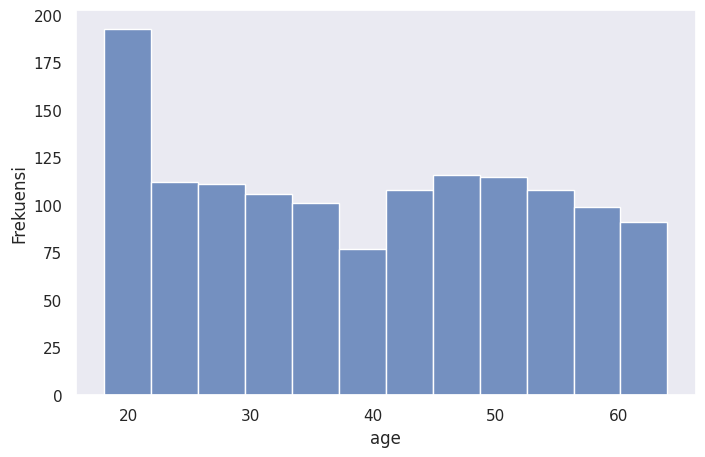

In [19]:
plt.figure(figsize = (8,5))
sns.set_theme(style = "dark")
sns.histplot(data = df, x = "age", palette = "pastel")
plt.ylabel("Frekuensi")
plt.show()

<ipython-input-22-b330cd9d6b79>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["charges"], color = "skyblue")


<Axes: xlabel='charges', ylabel='Density'>

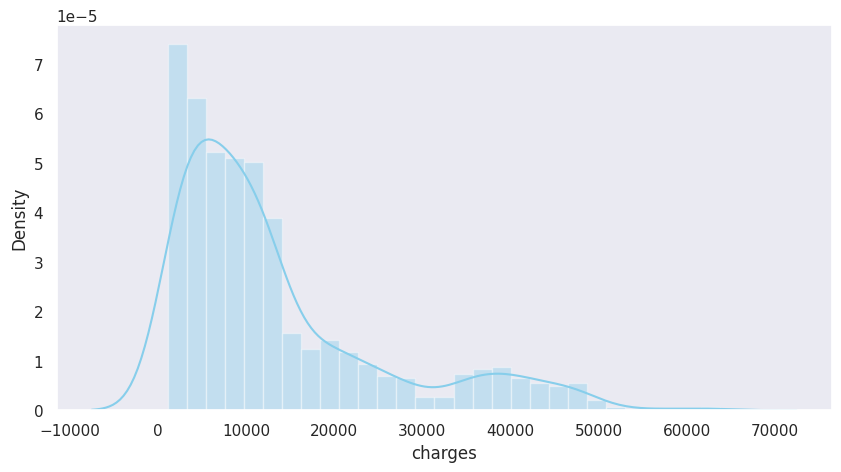

In [22]:
plt.figure(figsize = (10,5))
sns.distplot(df["charges"], color = "skyblue")

<Axes: ylabel='count'>

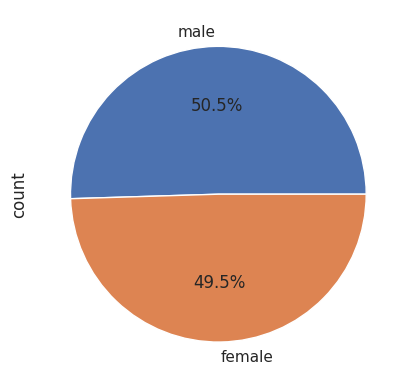

In [23]:
df["sex"].value_counts().plot(kind = "pie", autopct = "%1.1f%%")

# **Explanatory Data Analysis (EDA)**

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1337 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1337 non-null   int64  
 1   sex       1337 non-null   object 
 2   bmi       1337 non-null   float64
 3   children  1337 non-null   int64  
 4   smoker    1337 non-null   object 
 5   region    1337 non-null   object 
 6   charges   1337 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 83.6+ KB


In [25]:
sx = LabelEncoder()
sk = LabelEncoder()
rg = LabelEncoder()

df["sex"] = sx.fit_transform(df["sex"])
df["smoker"] = sk.fit_transform(df["smoker"])
df["region"] = rg.fit_transform(df["region"])

In [28]:
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

In [27]:
X = df.drop(columns = ["charges"])
y = df["charges"]

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

# **Modelling**

In [33]:
lr = LinearRegression()
lr.fit(X_train,y_train)

y_pred = lr.predict(X_test)
score = lr.score(X_test, y_test)

print(score)
print("score : {:.2f}%".format(score*100))

0.8068466322629113
score : 80.68%
